# Worksheet 3 - Scientific Visualization MVE080/MMG640
## Uncertainty and geospatial data

This is the third worksheet in the course *Scientific Visualization*. This Jupyter notebook has three functions:

1. It describes the tasks.
2. It (sometimes) provides coding templates that you can use as a basis for your own code.
3. It is a template also for the report that you upload in Canvas.

The tasks are of various types: some are to read some text and then comment on it (no coding), and some are about creating visualizations using plotnine.
Once you're finished with all the tasks, export this document as an HTML-file and upload it in Canvas.
You are encouraged to discuss problems and solutions with your fellow students (in the class-room but also on CampusWire), but each student must solve all tasks by themselves and hand-in their own report.
Notice that Jupyter notebooks use [Markdown](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax#links) for writing text cells. Make sure you understand the basics. Later on you can also include $\LaTeX$ in your Markdown cells.

The below loads the packages required for this homework.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from plotnine import *
import warnings
warnings.filterwarnings("ignore")

# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

## Task 1

Read Chapter 15 and 22 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/), then answer the questions below.

### Question 1.1

During Lecture 5 we visualized uncertainty for point estimates using i) graded error-bars and ii) fuzziness (slide 6). Briefly describe when each kind of visual is suitable.

### Answer 1.1
_Fuzziness can make it easier to read, especially for laymen. Graded error-bars can better convey how probable different values are. So It depends on the occasion and audience where we are giving the presentation._

### Question 1.2

Another way to visualize uncertainty is a **Hypothetical outcome plots** (Chapter 16 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/)). Briefly describe the key features of such a visual.

### Answer 1.2
_It use animation simulations to visualize uncertainty in the data to avoid readers interpreting parts of the visualization for uncertainty as certain features._

### Question 1.3

Often when doing regression (fitting a curve to data) we want to do use the regression model to make predictions. What is important to think about when visualizing model predictions?

### Answer 1.3
_We need to take into account the uncertainty of trend estimates and visualize it through confidence bands, etc._

### Question 1.4

An important element of a visual is the title, what should be the job of the title?

### Answer 1.4
_The job of the title is to accurately convey to the reader what the figure is about, what point it makes._

### Question 1.5

Often when creating visuals of, for example, a trend over time for different categories we have a legend. How would you improve Fig. 20.5 in the course book, to make it easier to digest which line corresponds to which company?

### Answer 1.5
_We can fix the problem (the perceived order of the data lines differs from the order of the companies in the legend) by manually reordering the entries in the legend so they match the preceived ordering in the data._

## Uncertainty  

For this part reading chapter 16 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.

### Question 2.1

Coffee is undoubtedly a popular beverage (albeit inferior to tea :). On Canvas I have uploaded a dataset with ratings for coffee beans from six different countries. 

Here we are interested in identifying which country on average has the best quality beans. Create two plots, where in i) you plot the mean ($\mu$) and standard deviation for each country (using errorbars), and ii) where you plot the mean and standard error of the mean estimate. Briefly discuss the drawbacks with error-bars. 

As a reminder. For country $j$ with coffee ratings $x^{(j)}_1, \ldots, x^{(j)}_{n_j}$ the sample mean is given by 

$$
\hat{\mu}^{(j)} = \sum_{i = 1}^{n_j} x_i^{(j)},
$$

sample standard deviation by

$$
\hat{\sigma}^{(j)} = \sqrt{\frac{1}{n - 1} \sum_{i = 1}^{n_j} (x_i^{(j)} - \hat{\mu}^{(j)})^2},
$$

and sample standard error for $\hat{\mu}^{(j)}$

$$
\hat{\sigma}_{\hat{\mu}^{(j)}} = \frac{\hat{\sigma}^{(j)}}{\sqrt{n}}
$$

and a confidence interval with confidence level $1 - \alpha$ is given by;

$$
\hat{\mu}^{(j)} \pm t_{n-1}(1 - \alpha / 2) \hat{\sigma}_{\hat{\mu}^{(j)}}
$$

where $t_{n-1}$ is the t-distribution with $n-1$ degree of freedom. For confidence level $1 - \alpha=0.95$ and $n = 30$ we have that $t_{29}(1 - 0.025) \approx 2.05$.

  country_of_origin       mean  median       std  count   stderro
0            Brazil  82.405909  82.420  2.132902    132  0.185645
1          Colombia  83.106557  83.250  1.413273    183  0.104472
2         Guatemala  81.846575  82.500  2.885169    181  0.214453
3             Kenya  84.309600  84.580  1.459733     25  0.291947
4            Mexico  80.890085  81.625  2.742413    236  0.178516


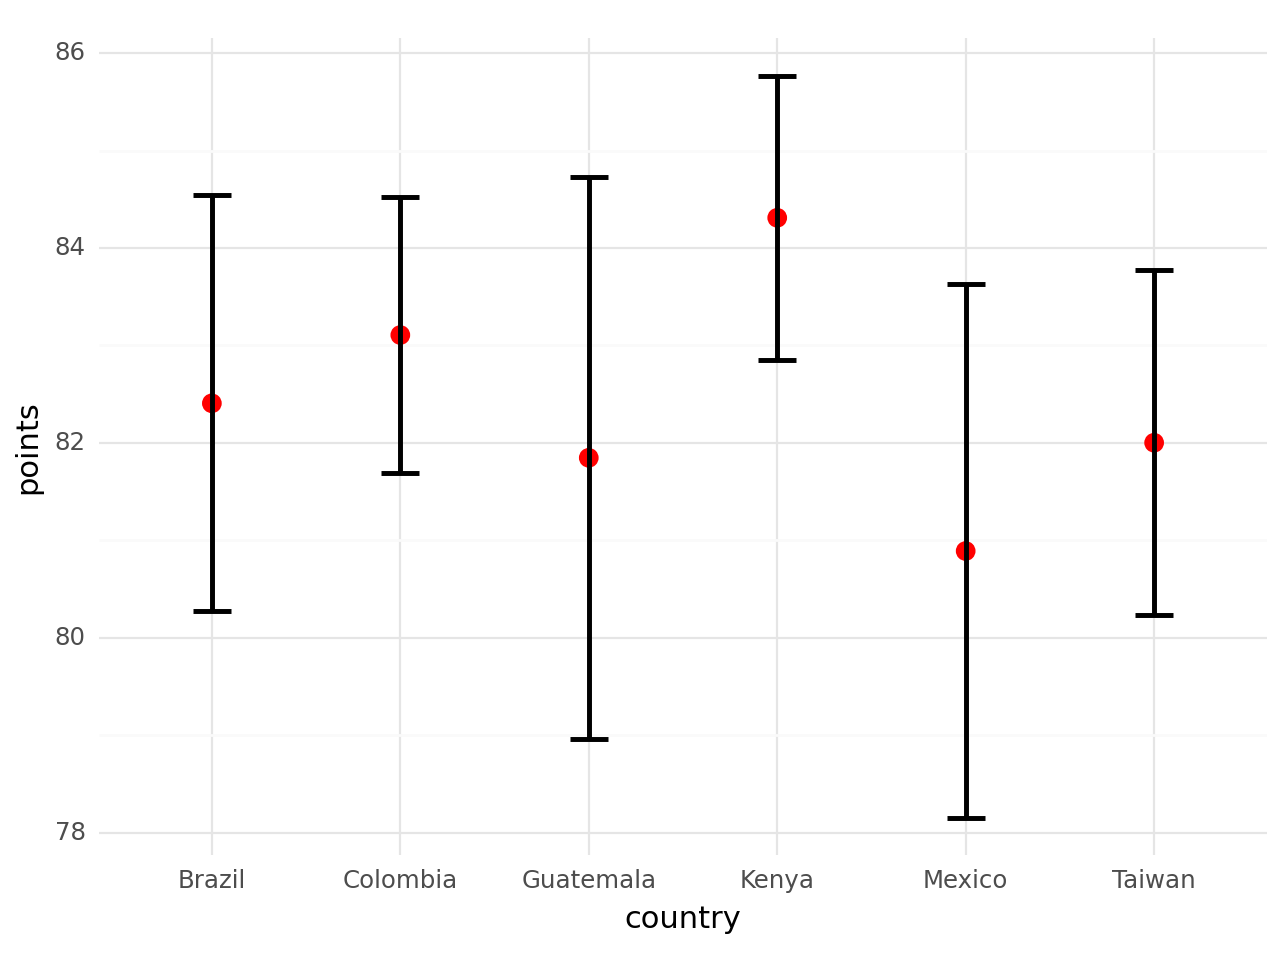

<Figure Size: (640 x 480)>

In [2]:
# Insert code here for visual 1
df = pd.read_csv('Coffee_tidy.csv')

summary = df.groupby(['country_of_origin'])['total_cup_points'].agg(['mean', 'median', 'std', 'count']).reset_index()
summary['stderro'] = summary['std'] / np.sqrt(summary['count'])
print(summary.head())

summary['country_of_origin'] = pd.Categorical(summary['country_of_origin'], categories=summary['country_of_origin'].unique())

p1 = (ggplot(summary, aes('country_of_origin', 'mean'))
      + geom_point(size = 3.0, color = 'red')
      + geom_errorbar(aes(ymin = 'mean - std', ymax = 'mean + std'), width = 0.2, size = 1.0)
      + theme_minimal()
      + labs(x = 'country', y = 'points'))
p1
# Remember to print the visual 

d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\mizani\scale.py:210: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\mizani\scale.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

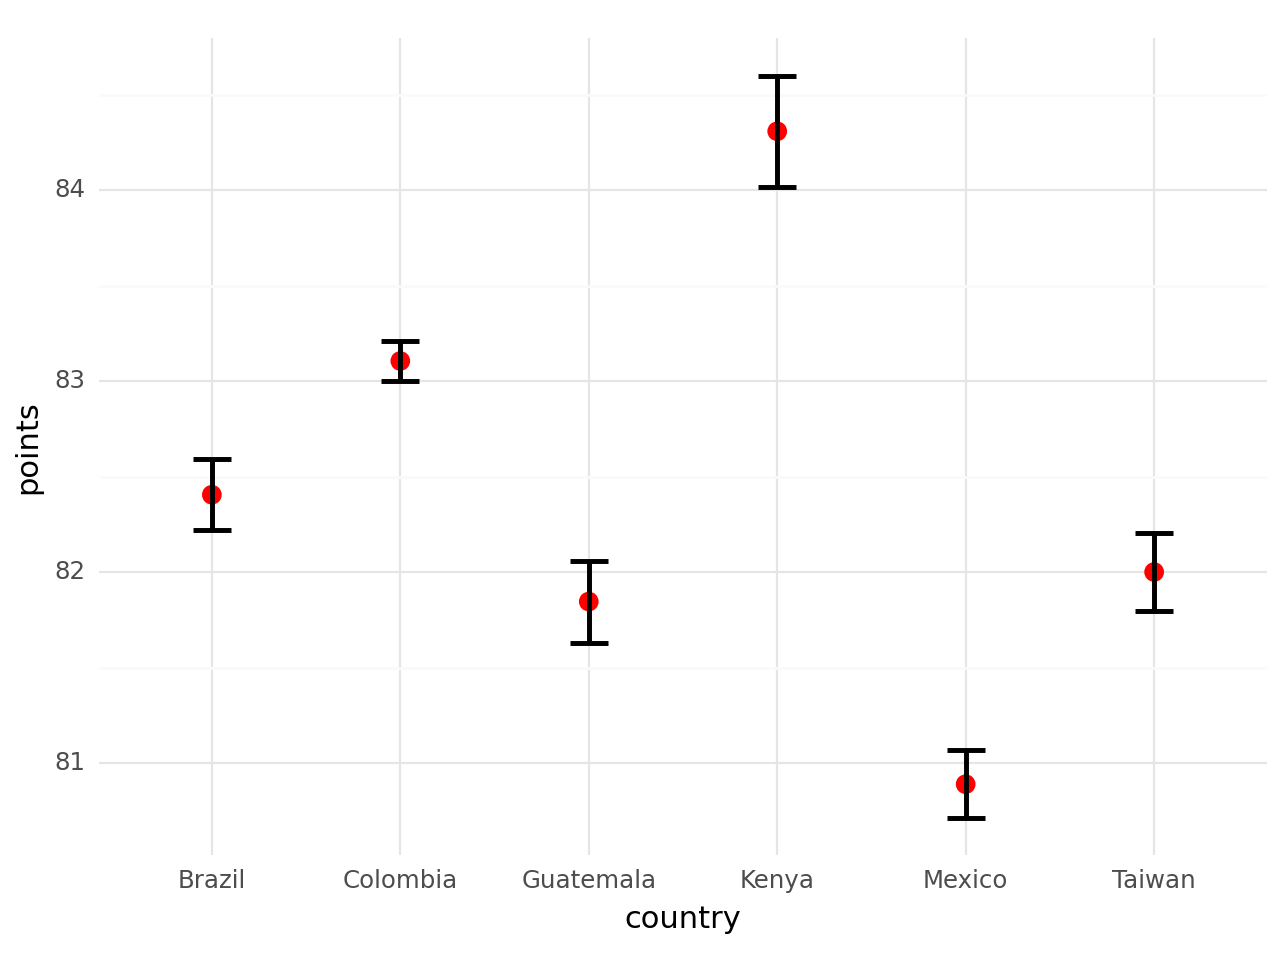

<Figure Size: (640 x 480)>

In [3]:
# Insert code here for visual 2
df = pd.read_csv('Coffee_tidy.csv')

summary = df.groupby(['country_of_origin'])['total_cup_points'].agg(['mean', 'median', 'std', 'count']).reset_index()
summary['stderro'] = summary['std'] / np.sqrt(summary['count'])
summary.head()


p2 = (ggplot(summary, aes('country_of_origin', 'mean'))
      + geom_point(size = 3.0, color = 'red')
      + geom_errorbar(aes(ymin = 'mean - stderro', ymax = 'mean + stderro'), width = 0.2, size = 1.0)
      + theme_minimal()
      + labs(x = 'country', y = 'points'))
p2
# Remember to print the visual 

* It is easy for readers to be confused about what an error bar represents. So we better state what the error-bars are showing.*

### Question 2.2

Now using the coffee dataset visualize the uncertainty in the mean estimate using i) graded error-bars (here plot confidence intervals with 80%, 90% and 99% confidence) and ii) fuzzy error bars (as in slide 6 in Lecture 5).

2.045229642132703 1.311433643950529 1.6991270265334972 2.756385903670335
   country_of_origin       mean  median       std  count   stderro CI_percent  \
0             Brazil  82.405909  82.420  2.132902    132  0.185645        80%   
1             Brazil  82.405909  82.420  2.132902    132  0.185645        90%   
2             Brazil  82.405909  82.420  2.132902    132  0.185645        99%   
3           Colombia  83.106557  83.250  1.413273    183  0.104472        80%   
4           Colombia  83.106557  83.250  1.413273    183  0.104472        90%   
5           Colombia  83.106557  83.250  1.413273    183  0.104472        99%   
6          Guatemala  81.846575  82.500  2.885169    181  0.214453        80%   
7          Guatemala  81.846575  82.500  2.885169    181  0.214453        90%   
8          Guatemala  81.846575  82.500  2.885169    181  0.214453        99%   
9              Kenya  84.309600  84.580  1.459733     25  0.291947        80%   
10             Kenya  84.309600  84.

d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

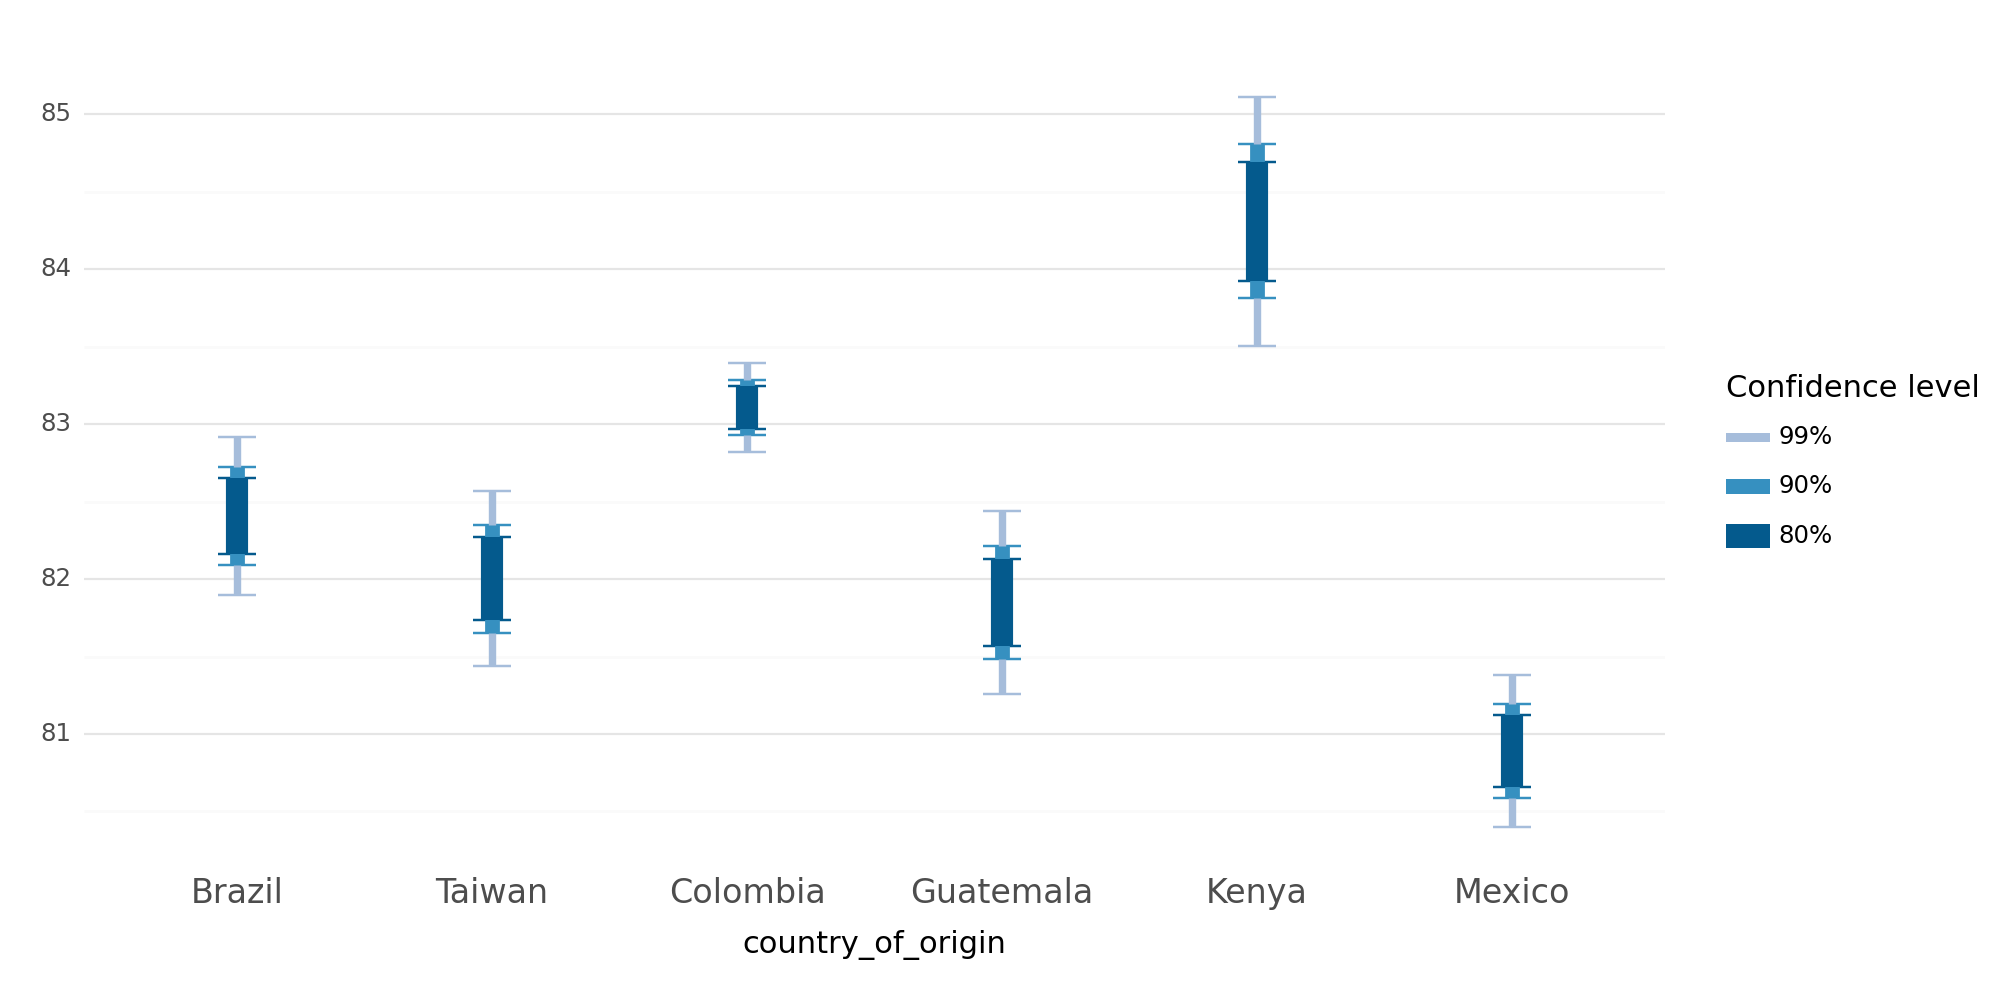

<Figure Size: (1000 x 500)>

In [4]:
# Insert code here for visual 1
from scipy.stats import t
t_statistic0 = t.ppf(1 - 0.025, df=29)
t_statistic1 = t.ppf(1 - 0.1, df=29)
t_statistic2 = t.ppf(1 - 0.05, df=29)
t_statistic3 = t.ppf(1 - 0.005, df=29)

print(t_statistic0, t_statistic1, t_statistic2, t_statistic3)

df = summary
new_rows = []
for index, row in df.iterrows():
  for percentage in ['80%', '90%', '99%']:
    new_row = row.copy()

    new_row['CI_percent'] = percentage 

    if new_row['CI_percent'] == '80%':
        new_row['CI_low'] = new_row['mean'] - t_statistic1 * new_row['stderro']
        new_row['CI_high'] = new_row['mean'] + t_statistic1 * new_row['stderro']
    elif new_row['CI_percent'] == '90%':
        new_row['CI_low'] = new_row['mean'] - t_statistic2 * new_row['stderro']
        new_row['CI_high'] = new_row['mean'] + t_statistic2 * new_row['stderro']
    elif new_row['CI_percent'] == '99%':
        new_row['CI_low'] = new_row['mean'] - t_statistic3 * new_row['stderro']
        new_row['CI_high'] = new_row['mean'] + t_statistic3 * new_row['stderro']

    new_rows.append(new_row)

new_df = pd.DataFrame(new_rows)
new_df.reset_index(drop=True, inplace=True)
new_df.head()
df = new_df
# df = df.sort_values(by=['CI_percent'], ascending=[True])
print(df)
df = df.assign(CI_percent = pd.Categorical(df["CI_percent"], categories=["99%", "90%", "80%"]))
df = df.assign(country_of_origin = pd.Categorical(df["country_of_origin"], categories=["Brazil", "Taiwan", "Colombia", 'Guatemala', 'Kenya', 'Mexico']))

p = (ggplot(df, aes(x = 'country_of_origin'))
     + geom_errorbar(aes(ymin = 'CI_low', ymax = 'CI_high', color = 'CI_percent'), width = 0.15)
     + geom_errorbar(aes(ymin = 'CI_low', ymax = 'CI_high', color = 'CI_percent', size = 'CI_percent'), width=0.000000001)
     + scale_color_manual(values = ["#a6bddb", "#3690c0", "#045a8d"], name = "Confidence level")
     + scale_size_manual(values = [1.5, 3.0, 4.5], name = "Confidence level")
     + theme_minimal()
     + theme(panel_grid_major_x=element_blank(),
          axis_text_x = element_text(size=12))
     + theme(figure_size=(10, 5)))
p

     val_line  color_line country_of_origin
0   81.894199    0.000000            Brazil
1   81.904537    1.020408            Brazil
2   81.914874    2.040816            Brazil
3   81.925212    3.061224            Brazil
4   81.935549    4.081633            Brazil
..        ...         ...               ...
95  82.519605    4.081633            Taiwan
96  82.530996    3.061224            Taiwan
97  82.542386    2.040816            Taiwan
98  82.553777    1.020408            Taiwan
99  82.565167    0.000000            Taiwan

[600 rows x 3 columns]


d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\mizani\scale.py:210: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\mizani\scale.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

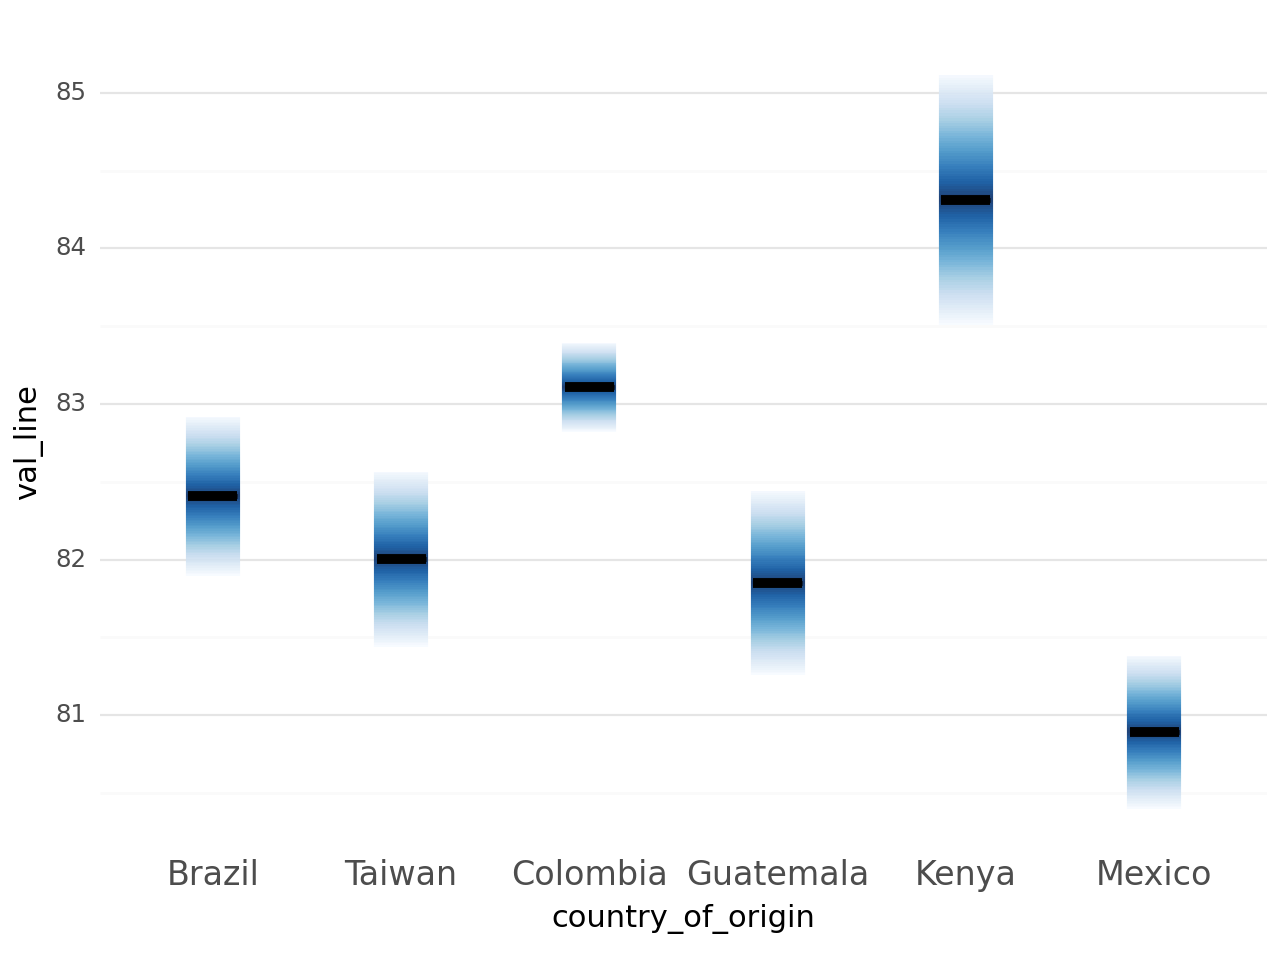

<Figure Size: (640 x 480)>

In [5]:
# Insert code here for visual 2
data_fuzzy_tmp = df.query("CI_percent == '99%'")
data_sum_90 = df.query("CI_percent == '90%'")
data_sum_80 = df.query("CI_percent == '80%'")
# df = df[df['CI_percent'] == '99%']
data_fuzzy_tmp

line_color = np.concatenate([np.linspace(0, 50, 50), np.linspace(50,0,50)])
data_fuzzy = pd.DataFrame()

# for i in range(data_fuzzy_tmp.shape[0]):
#   val_min, val_max = data_fuzzy_tmp['CI_low'].values[i], data_fuzzy_tmp['CI_high'].values[i]
#   df_tmp = pd.DataFrame({'val_line' : np.linspace(val_min, val_max, 100),
#                          'color_line' : line_color})
#   df_tmp['country_of_origin'] = data_fuzzy_tmp['country_of_origin'].values[i]
#   data_fuzzy = pd.concat([data_fuzzy, df_tmp])

# data_fuzzy.iloc[400:499]
  
for index, row in data_fuzzy_tmp.iterrows():
   val_min, val_max = row['CI_low'], row['CI_high']
   df_tmp = pd.DataFrame({'val_line' : np.linspace(val_min, val_max, 100),
                         'color_line' : line_color})
   df_tmp['country_of_origin'] = row['country_of_origin']
   data_fuzzy = pd.concat([data_fuzzy, df_tmp])

print(data_fuzzy)

p = (ggplot(data_fuzzy, aes('country_of_origin', 'val_line'))
     + geom_line(aes(color = 'color_line'), size = 11.0, alpha = 0.9)
     + geom_crossbar(data = data_sum_80, mapping = aes(y = 'mean', ymin = 'mean', ymax = 'mean'), width = 0.26, size = 1.0)
     + scale_color_cmap('Blues')
     + theme_minimal()
     + theme(legend_position="none")
     + theme(panel_grid_major_x=element_blank(),
         axis_text_x = element_text(size=12))
     )

p
# Remember to print the visual 

### Question 2.3

Frequency graphs are a powerful tool for visualizing probabilities. On Canvas I have uploaded an image of such a graph, please recreate it (you do not have to recreate the colors perfectly). The figure might look strange when rendered in Jupyter (then it is better to save it to disk and see how it looks like),

d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\mizani\scale.py:210: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\mizani\scale.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


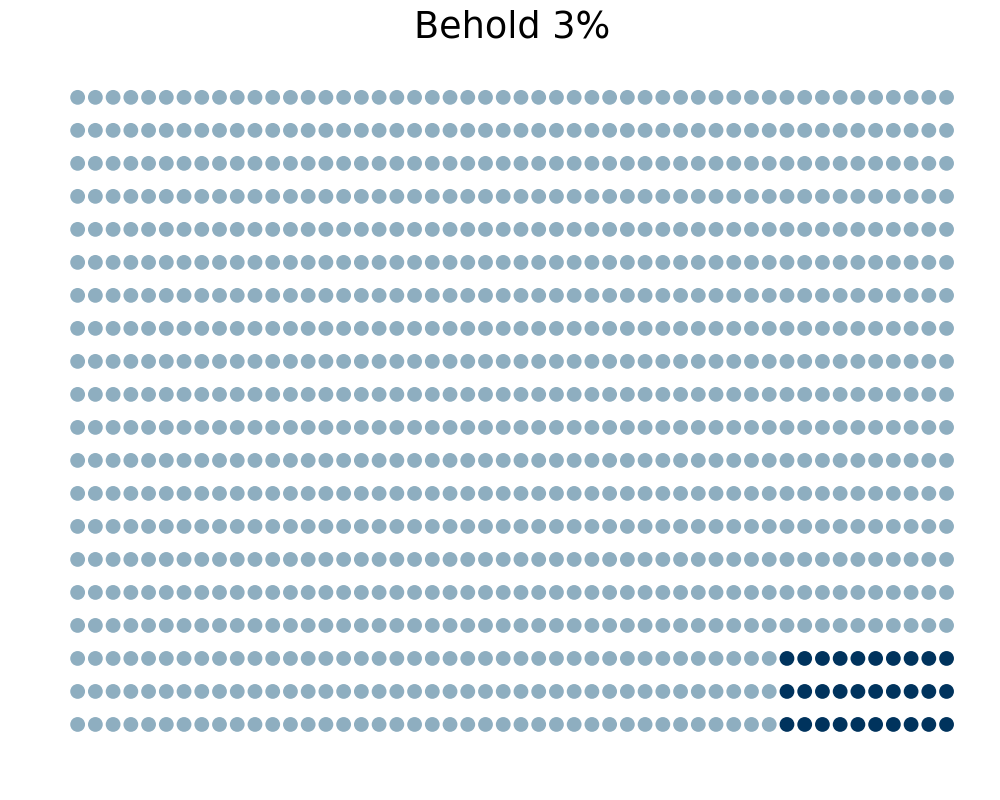

<Figure Size: (500 x 400)>

In [7]:
import matplotlib.pyplot as plt
import plotnine as pn
n_rows = 20
n_cols = 50
x, y = np.meshgrid(range(n_cols), range(n_rows))
data = pd.DataFrame({'x': x.flatten(), 'y': y.flatten()})
data2 = data.copy()

data['color'] = np.where((data['x'] >= n_cols // 1.25) & (data['y'] <= n_rows // (20/3)), 'dark', 'light')
data2['color'] = 'light'
# data
data.iloc[55,2]
color_mapping = {'light': '#8eaec0', 'dark': '#00335d'}

p1 = (ggplot(data, aes(x='x', y='y', color='color'))
     + geom_point(size=2)
     + scale_color_manual(values=color_mapping)
     + theme(axis_text=element_blank(), axis_ticks=element_blank(), figure_size=(5, 4), panel_background = element_blank(), legend_position="none", plot_title=pn.element_text(hjust=0.5))
     + labs(x = '', y = '', title = 'Behold 3%')
     )
p1
# p2 = (ggplot(data2, aes('x', 'y', color = 'color'))
#       + geom_point(size = 5)
#       + scale_color_manual(values=color_mapping)
#       + theme(axis_text=element_blank(), axis_ticks=element_blank(), figure_size=(3, 4), panel_background = element_blank(), legend_position="none")
#       + labs(x = '', y = '')
#       )

# p3_to_p10 = [p2 + theme() for _ in range(9)]
# print(p1)
# print(p1)
# Remember to print the visual 

d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
d:\anaconda3\envs\MVE080-1\Lib\site-packages\mizani\scale.py:210: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\mizani\scale.py:223: FutureWarni

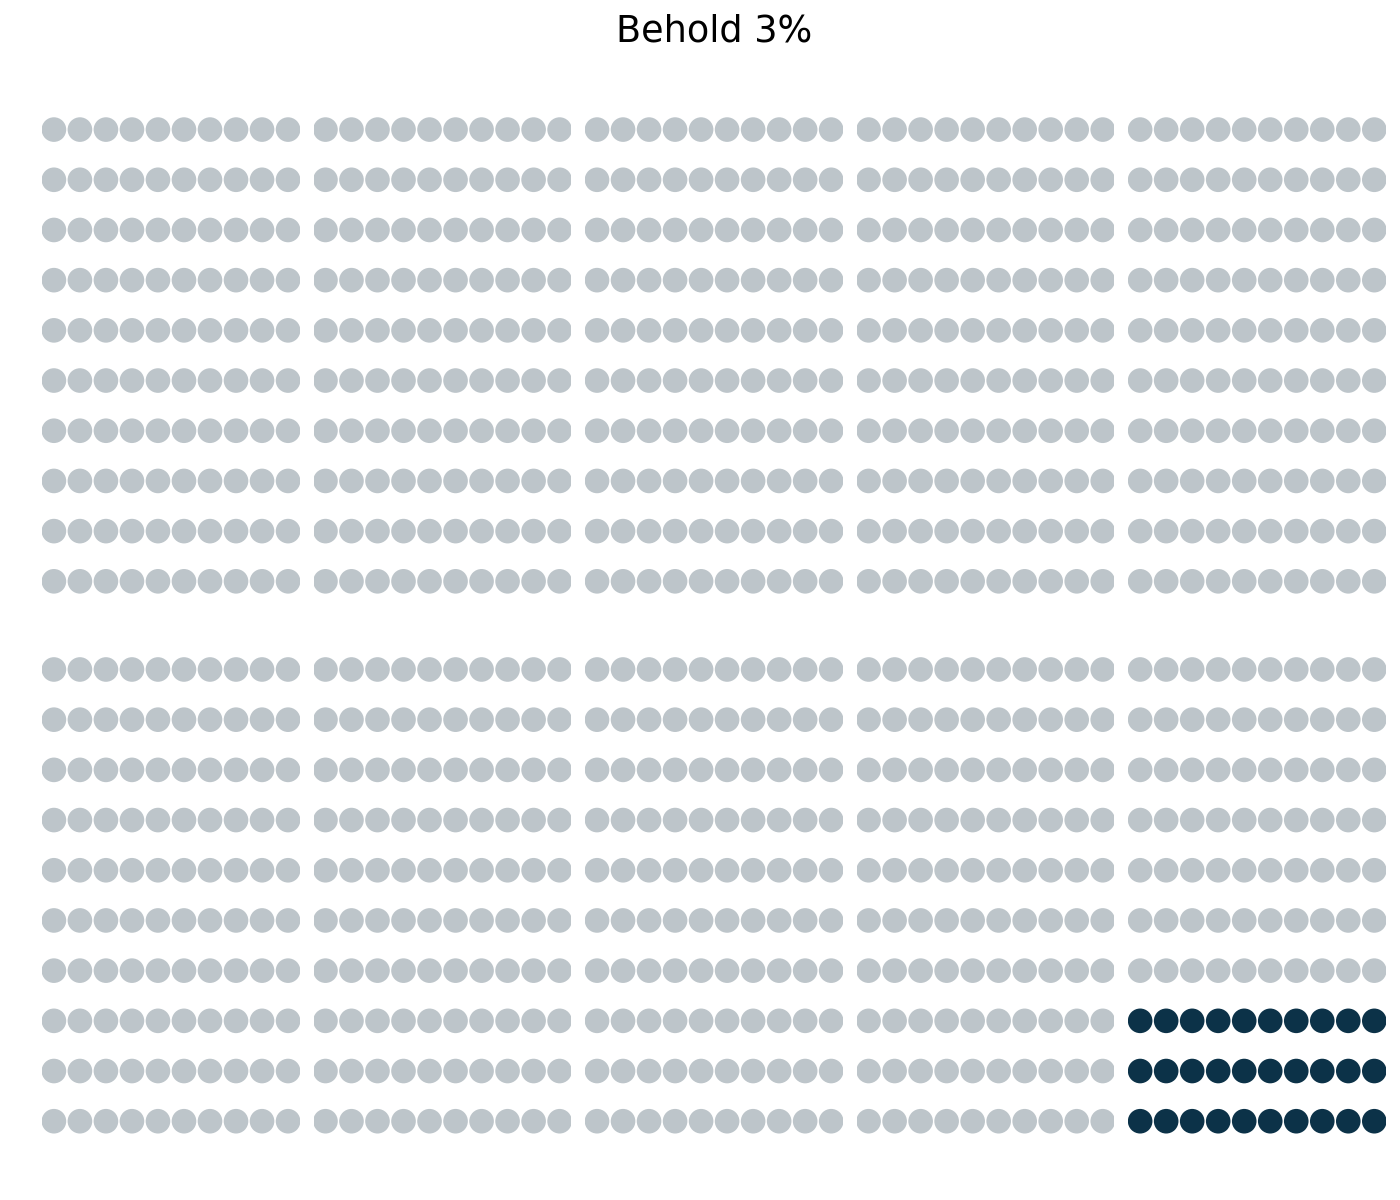

<Figure Size: (700 x 600)>

In [8]:
n_rows = 10
n_cols = 10
x, y = np.meshgrid(range(n_cols), range(n_rows))
data = pd.DataFrame({'x': x.flatten(), 'y': y.flatten()})
data['color'] = np.where((data['y'] >= 3), 'light', 'dark')
data['index'] = '1'

data_list = []
for i in range(2, 11):
    df = pd.DataFrame({'x': x.flatten(), 'y': y.flatten()})
    df['color'] = 'light'
    df['index'] = str(i)
    data_list.append(df)


data_list.append(data)
merged_data = pd.concat(data_list,names=['index'])

merged_data.to_csv('merged_data.csv', index=False)

merged_data['index'] = pd.Categorical(merged_data['index'], categories=['2', '3', '4', '5', '6', '7' , '8', '9', '10', '1'])
merged_data['color'] = pd.Categorical(merged_data['color'], categories=['light', 'dark'])

p1 = (ggplot(merged_data, aes(x = 'x', y ='y', fill = 'color'))
      + geom_point(size = 5, stroke=0)
      + scale_fill_manual(values=['#bdc5ca', '#0c3248'], name = "Year")
      + facet_wrap('~ index', nrow=2)
      + theme(figure_size=(7, 6), panel_background = element_rect(fill = 'white'), 
             strip_text=element_blank(),  
             strip_background = element_blank(),
          #    axis_text=element_blank(),  
             axis_ticks=element_blank(), 
             panel_grid=element_blank(),
             axis_text_x=element_blank(),
             axis_text_y=element_blank(), plot_title=pn.element_text(hjust=0.5)
             )
       + labs(x = '', y = '', title = 'Behold 3%')
       + guides(fill=False)
      )
p1

### Question 2.4

There are different ways to visualize curve fits. One is the fan plot (slide 18 lecture 5) - on Canvas I have uploaded a fan plot and associated dataset, use this dataset to recreate the visual.

**Note** - I generated hypothetical outcomes via bootstraping, for computational speed it might be worthwhile to downsample the hypothetical outcomes.

d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


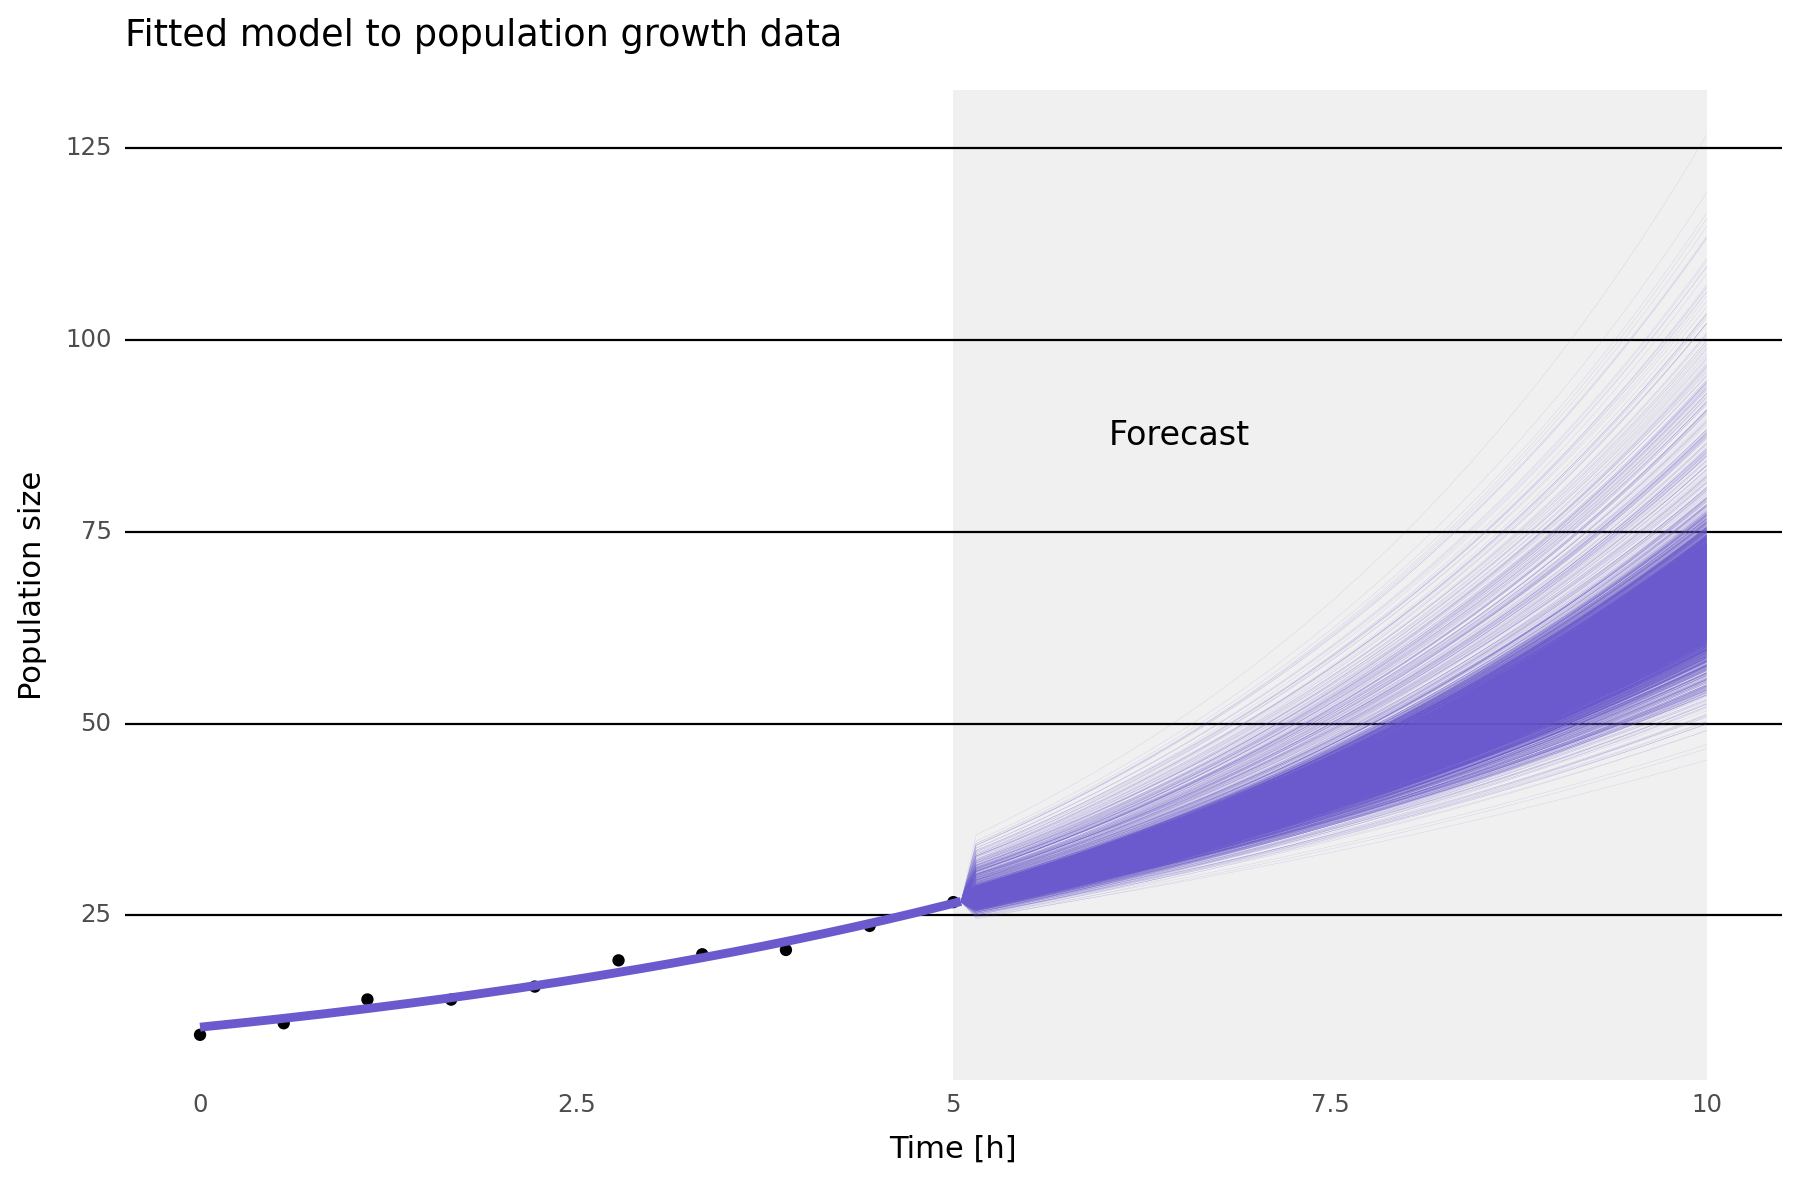

<Figure Size: (900 x 600)>

In [44]:
# Insert code here 
data_obs = pd.read_csv('Data_obs-1.csv')
data_fit = pd.read_csv('Fit_fan.csv')
data_pred = pd.read_csv('Pred_funnel.csv')
# data_pred['t'] = pd.Categorical(data_pred['t'], categories = data_pred['t'].unique())
# data_pred['index'] = data_pred['index'].astype('category')

p = (ggplot(data_fit, aes('t'))
     + geom_rect(aes(xmin=5.0, xmax=10.0, ymin=-np.Inf, ymax=np.Inf), fill="#f0f0f0", alpha=1)
     + geom_point(data=data_obs, mapping=aes(x = "t", y = "N"))
     + geom_line(aes("t", "median"), color = 'slateblue', size = 1.8)
     + geom_line(data = data_pred, mapping = aes(x = 't', y = 'N_pred', group = 'index'), color = 'slateblue', size = 0.05, alpha = 0.37)
     + annotate("text", x = 6.5, y = 87.5, label = "Forecast", size=12)
     + labs(x = "Time [h]", y = "Population size", title = "Fitted model to population growth data")
     + theme_minimal()
     + theme(panel_grid_major_x=element_blank(), 
            panel_grid_minor_x=element_blank(), 
            panel_grid_major_y=element_line(color="black"), 
            panel_grid_minor_y=element_blank(),
            panel_ontop=True,
            figure_size=(9, 6)))
p
# Remember to print the visual 

## Storytelling with data

For this part reading chapter 20 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help. An important part for making people interact with your visual is that it looks good, therefore, for this part I will also judge the aesthetics of the visual, as well if it efficiently conveys the intended message.

### Question 3.1

To make a visual accessible it is important to think like a designer - and a key feature here is to cleverly use highlighting and text annotations. An example of a well-designed visual is the Goal-attainment visual on slide 25 (lecture 6), to practice annotations recreate it. The dataset is on Canvas. 

d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinsta

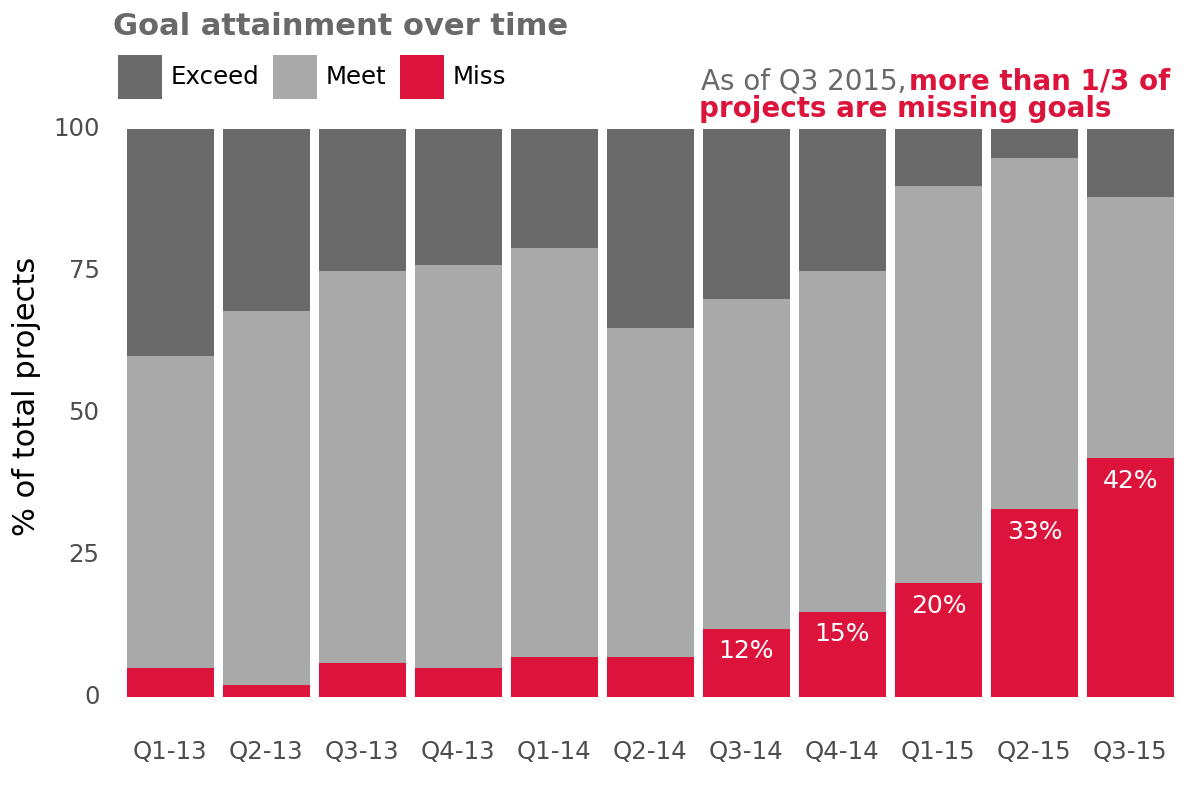

<Figure Size: (600 x 400)>

In [314]:
# Insert code here 
df = pd.read_csv('Goal_data.csv')
color_use = ["dimgray", "darkgray", "crimson"]
order_what = ['Exceed', 'Meet', 'Miss' ]
df['categories'] = pd.Categorical(df['categories'], categories = df['categories'].unique(), ordered = True)
df['what'] = pd.Categorical(df['what'], categories = order_what)
df['value2'] = df['value'].astype(str) + '%'

p = (ggplot(df, aes(x = 'categories', y = 'value', fill = 'what'))
     + geom_bar(stat="identity", position = 'stack')
     + scale_fill_manual(values = color_use, name = '', limits = ['Exceed', 'Meet', 'Miss'])
     + theme_minimal()
     + theme(legend_position=[0.26,0.93], figure_size=(6, 4), panel_spacing=(6,8), panel_background = element_rect(fill = 'white'), 
             strip_text=element_blank(),  
             strip_background = element_blank(),
             axis_ticks=element_blank(), 
             panel_grid=element_blank(),
             plot_title = element_text(color = 'dimgray')
             )
     + guides(fill=guide_legend(title=""))
     + theme(plot_title = element_text(hjust = 0, vjust = 1, size = 11, weight='bold'))
     + labs(x = '', y = '% of total projects', title = 'Goal attainment over time')
     + geom_text(aes(x='categories', y='value', label='value2'), data=df[(df['categories'].isin(['Q3-14', 'Q4-14', 'Q1-15', 'Q2-15', 'Q3-15'])) & (df['what'] == 'Miss')], color='white', size=9, nudge_y = -4)
     + annotate('text', x=10.05, y=106, label='more than 1/3 of', color='crimson', size=10, ha='center', va='bottom', fontweight='bold')
     + annotate('text', x=7.6, y=106, label='As of Q3 2015,', color='dimgray', size=10, ha='center', va='bottom')
     + annotate('text', x=8.65, y=101, label='projects are missing goals', color='crimson', size=10, ha='center', va='bottom', fontweight='bold')
    #  + annotate('text', x=3, y=120, label='projects are missing goals', color='crimson', size=11, ha='center', va='bottom')
    #  + geom_text(x='Q1-15', y=100, label='kk', color='blue', size=12)
    #  + geom_text(mapping=aes(label='Custom Text'), color='blue', size=12, x='Q1-15', y=100)
     )
p
# Remember to print the visual 

Briefly comment on why red is a good choice of color in this visual.

*We chose red because the message we want to convey is: after Q3 in 2014, the proportion of Missing Goals has increased significantly, and this is information that requires warning. Red is often considered to have a warning effect.*

### Question 3.2

On slide 23 in lecture 6 I gave the Spanish unemployment data a long needed makeover - specifically I made it accessible for a wider audience. Choose any visual from the slides in lecture 1-5, decide upon a point you want to make, and use the lessons from lecture 6 to make that point accessible. 

Provide motivation to how the changes to the visual has made it more accessible.

d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


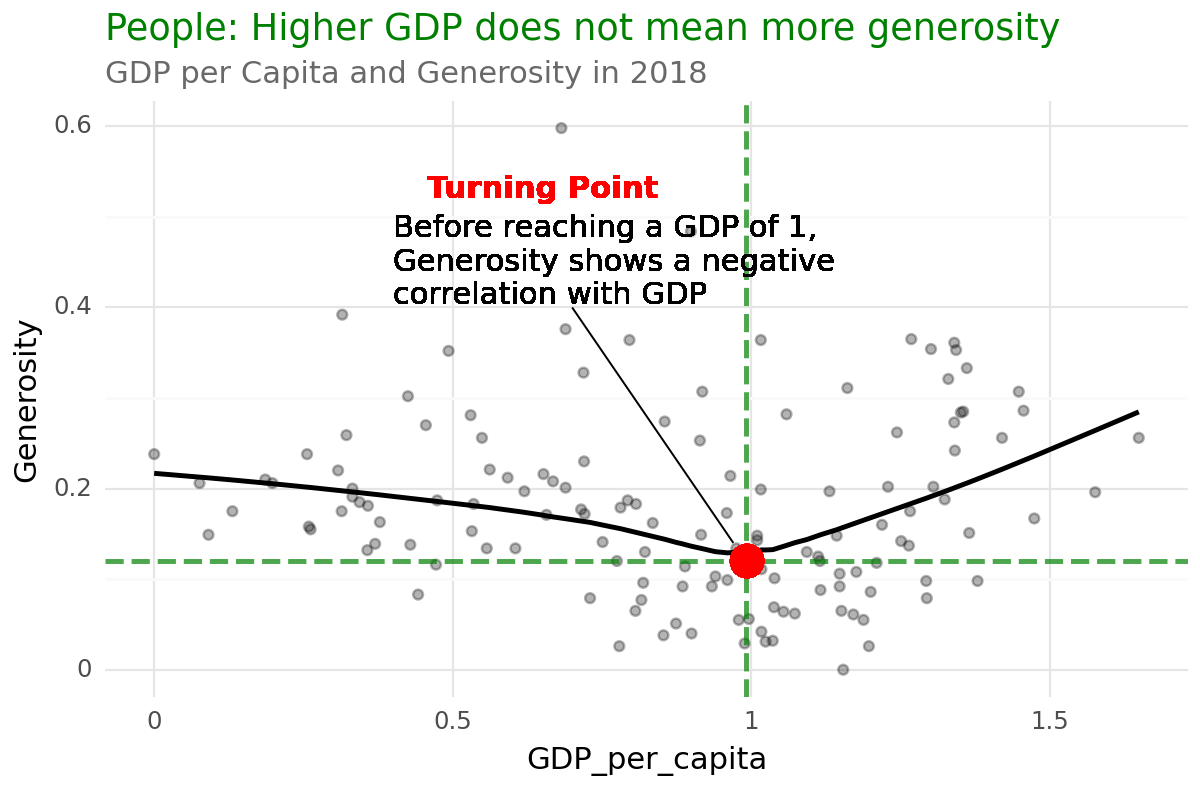

<Figure Size: (600 x 400)>

In [421]:
# Insert code here 
df = pd.read_csv('World_2018-1.csv')
df.head()

data_line = pd.DataFrame({'x' : [0.7,0.97], 'y' : [0.4,0.14]})
p = (ggplot(df, aes('GDP_per_capita', 'Generosity'))
    + geom_point(alpha = 0.3)
    + geom_smooth()
    + geom_vline(xintercept=0.992, linetype="dashed", color="green", alpha=0.7, size=1)
    + geom_hline(yintercept=0.12, linetype="dashed", color="green", alpha=0.7, size=1)
    + geom_point(x = 0.993, y = 0.12, size = 6, color = 'red')
    # + theme_bw()
    + theme_minimal()
    + theme(figure_size=(6, 4), 
            # panel_grid_major_x=element_blank(),
            panel_grid_minor_x=element_blank(),
            plot_title = element_text(color = 'green'),
            plot_subtitle = element_text(color = 'dimgray')
             )
    + labs(title="People: Higher GDP does not mean more generosity",
           subtitle="GDP per Capita and Generosity in 2018")
    + geom_path(data = data_line, mapping = aes(x = 'x', y = 'y'), size = 0.4)
    + geom_text(x = 0.65, y = 0.53, label = 'Turning Point', fontweight="bold", color = 'red')
    + geom_text(x = 0.4, y = 0.45, label = 'Before reaching a GDP of 1,\nGenerosity shows a negative\ncorrelation with GDP', ha="left")
    )

p
# Remember to print the visual 

*The message I want to convey is that there is a non-positive relationship between generosity and GDP, which goes against common sense. The turning point is very important for this relationship, so I marked this point in the diagram and added a note next to it. I also draw horizontal and vertical lines at this point to help readers identify changes before and after the turning point. At the same time, I also clearly expressed this meaning in the title.*

### Question 3.3

On Canvas I have uploaded a made-up pie-chart example from a summer pilot program, where student prior and after the program were asked how excited they were about doing science. The program was a success, but, a pie-chart is not a good way to visualize the data. Using lessons from lecture 6 improve the visual, such that a wide audience can identify that the program was a success. 

In the new visual make use of proper highlighting, annotations, a good title, and choose a good form of visualisation. The new visual should include all the data used in the pie chart.

                       feel proportion2    time
data1 0             Excited       19.0%  Before
      1  Kind of interested       25.0%  Before
      2                  OK       40.0%  Before
      3           Not great        5.0%  Before
      4               Bored       11.0%  Before
data2 0             Excited       38.0%   After
      1  Kind of interested       30.0%   After
      2                  OK       14.0%   After
      3           Not great        6.0%   After
      4               Bored       12.0%   After


d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinsta

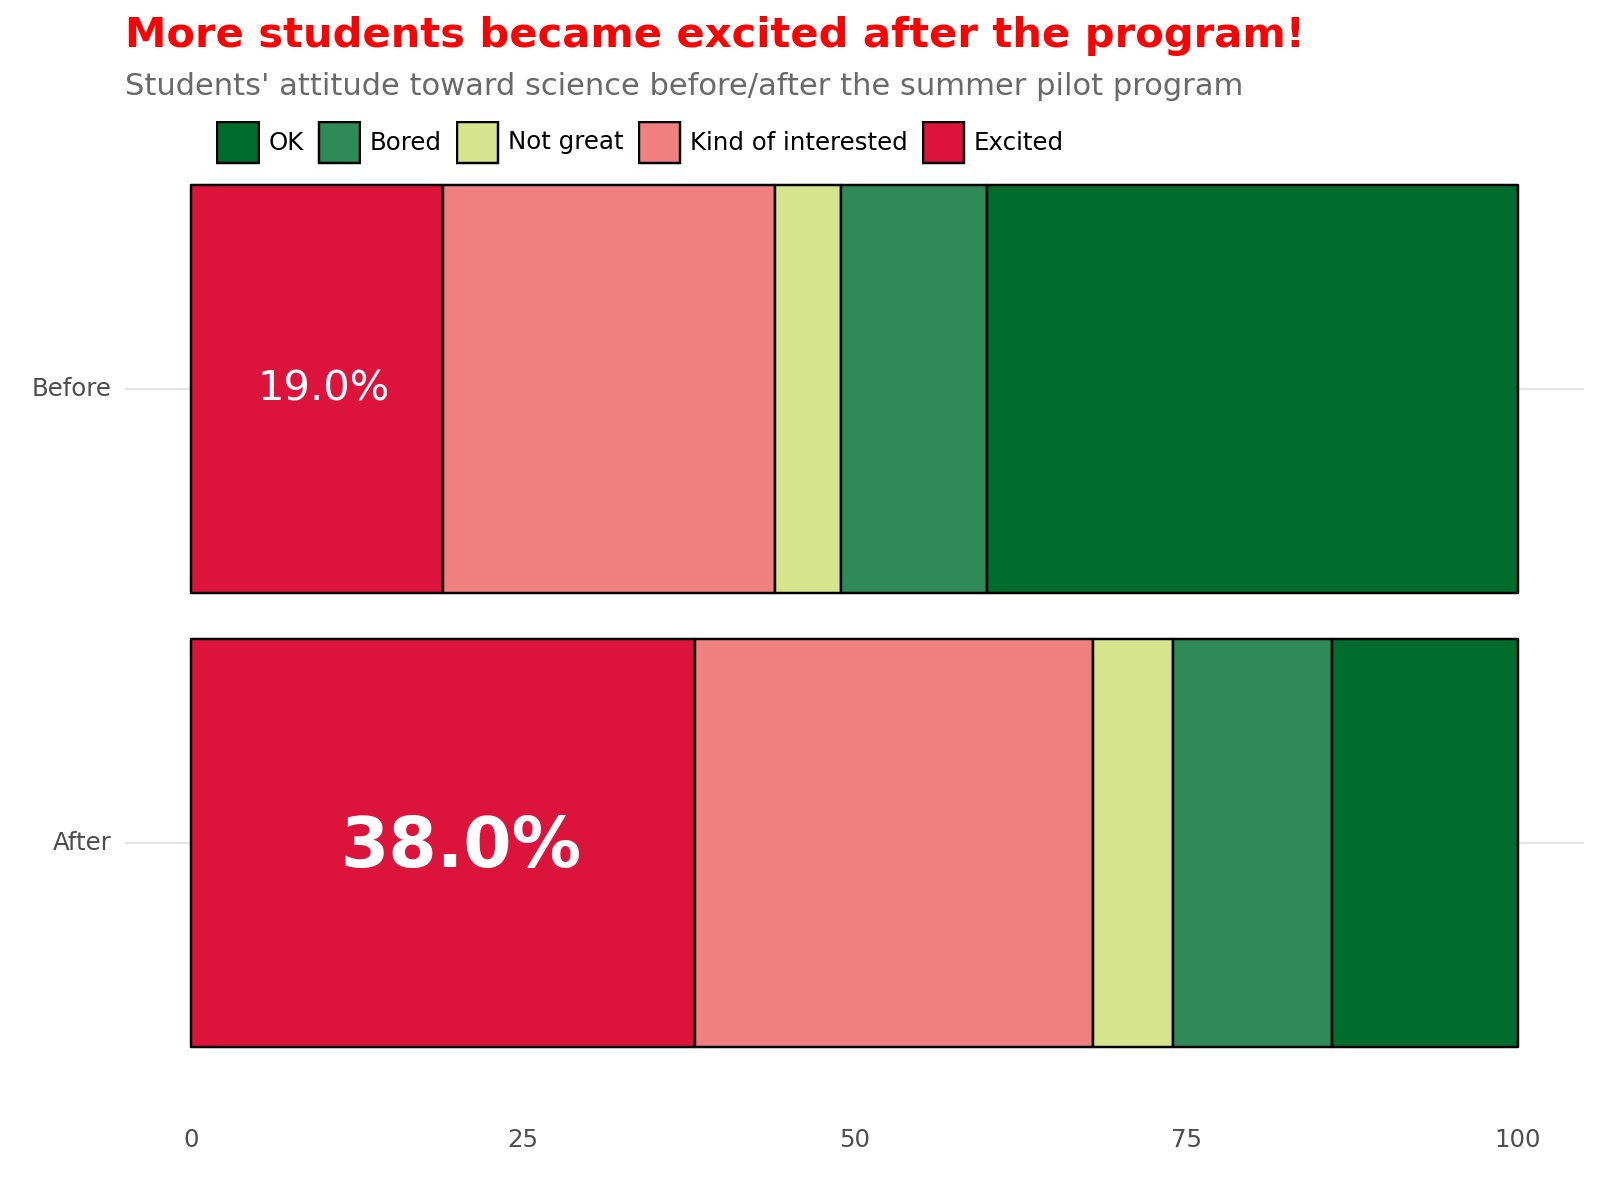

<Figure Size: (800 x 600)>

In [528]:
# Insert code here 
data1 = {
  'feel': ['Excited', 'Kind of interested', 'OK', 'Not great', 'Bored'],
  'proportion2': ['19.0%', '25.0%', '40.0%', '5.0%', '11.0%'],
  'time': ['Before'] * 5  
}
data2 = {
  'feel': ['Excited', 'Kind of interested', 'OK', 'Not great', 'Bored'],
  'proportion2': ['38.0%', '30.0%', '14.0%', '6.0%', '12.0%'],
  'time': ['After'] * 5 
}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

merged_df = pd.concat([df1, df2], keys=['data1', 'data2'])
print(merged_df)
merged_df['proportion'] = merged_df['proportion2'].str.rstrip('%').astype(float)

order_time = ['After', 'Before']
merged_df['time'] = pd.Categorical(merged_df['time'], categories = order_time)
order_feel = ['OK', 'Bored', 'Not great', 'Kind of interested', 'Excited']
# order_feel = ['Excited', 'Not great', 'Bored', 'Kind of interested', 'OK']
merged_df['feel'] = pd.Categorical(merged_df['feel'], categories = order_feel)

color_use = ["#006d2c", "seagreen", "#d7e48e",'lightcoral', 'crimson']
# color_use = ['red', 'lightcoral', "#bcbca6", "seagreen", "#006d2c"]

p3 = (ggplot(merged_df, aes(x = 'time', y = 'proportion', fill = 'feel'))
     + geom_bar(stat="identity", position = 'stack', color = 'black')
     + scale_fill_manual(values = color_use, name = '', limits = ['OK', 'Bored', 'Not great', 'Kind of interested', 'Excited'])
     + theme_minimal()
     + theme(figure_size=(8, 6), 
            legend_position=[0.4,0.9],
            panel_grid_major_x=element_blank(),
            panel_grid_minor_x=element_blank(),
            plot_title = element_text(color = 'red'),
            plot_subtitle = element_text(color = 'dimgray')
             )
     + theme(plot_title = element_text(hjust = 0, vjust = 1, size = 15, weight='bold'))
     + labs(x = '', y = '', title = 'More students became excited after the program!', subtitle="Students' attitude toward science before/after the summer pilot program")
     + guides(fill=guide_legend(title=""))
     + geom_text(aes(x='time', y='proportion', label='proportion2'), data=merged_df[(merged_df['feel'] == 'Excited') & (merged_df['time'] == 'Before') ], color='white', size=15, nudge_y = -9)
     + annotate('text', x=0.915, y=20.3, label='38.0%', color='white', size=25, ha='center', va='bottom', fontweight='bold')
     + coord_flip()
     )

p3

# Remember to print the visual 

### Question 3.4

Clutter is something we want to remove. On Canvas I have uploaded a visual on performance index for *Our Business* compared to other companies. Improve this visual such that it becomes easy to see how *Our Business* compares against the other companies for each category.

Provide a brief motivation to why your new visual is accessible.

d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\envs\MVE080-1\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

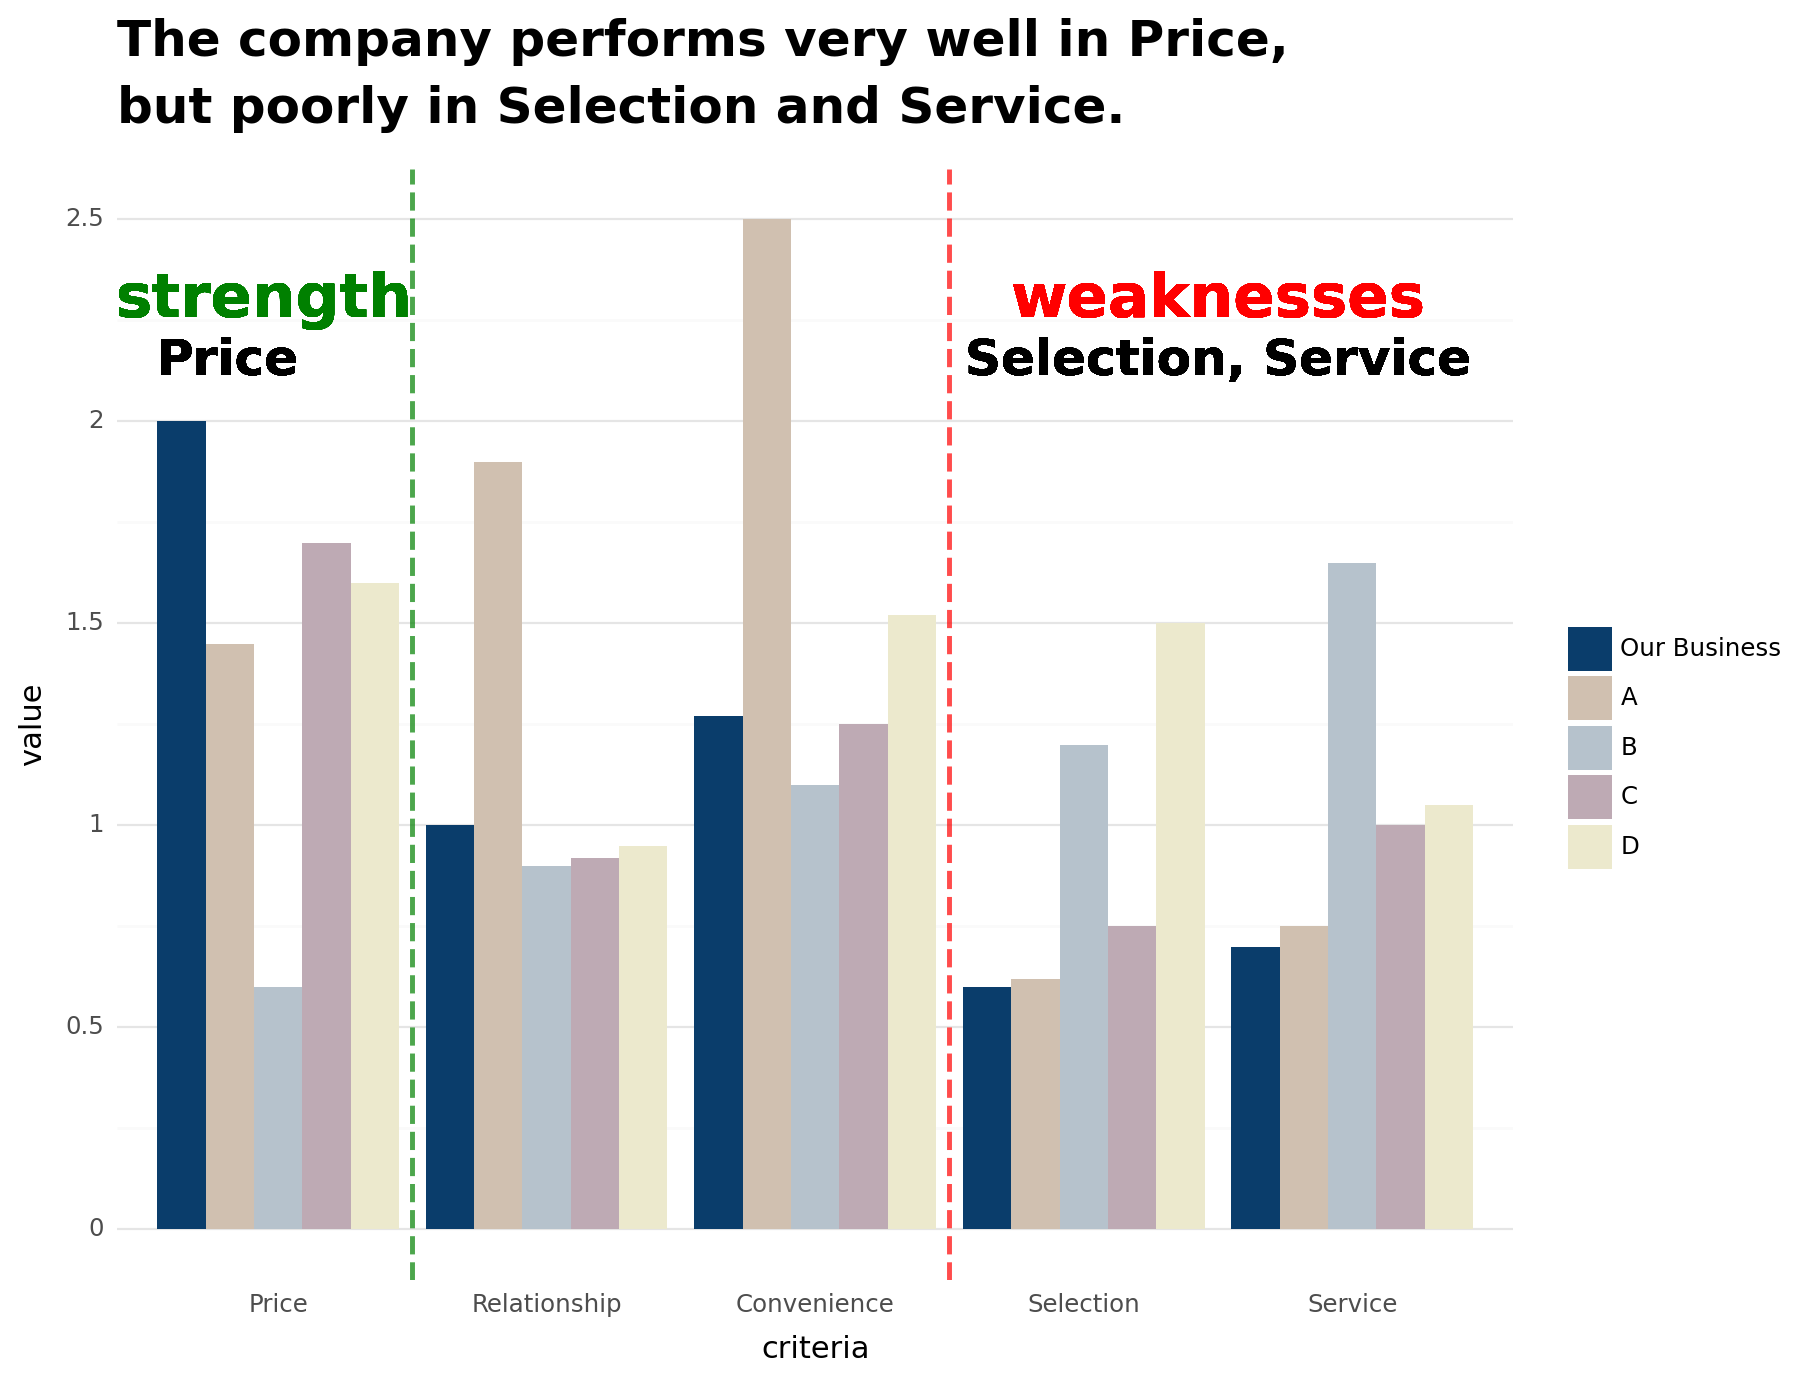

<Figure Size: (900 x 700)>

In [609]:
# Insert code here 
df = pd.read_csv('Performance_index.csv')
# print(df)
order = ['Our Business', 'A', 'B', 'C', 'D']
df['company'] = pd.Categorical(df['company'], categories = order)
order2 = ['Price', 'Relationship', 'Convenience', 'Selection', 'Service']
df['criteria'] = pd.Categorical(df['criteria'], categories = order2)
col_highlight = ["#0A3D6B", "#D0C0B0", "#B6C2CC", "#BEAAB4", "#ECE9CD", "#0D5C3D", "#812F02"]
data_line = pd.DataFrame({'x' : [4.5,4], 'y' : [2, 1]})

p = (ggplot(df, aes(x = 'criteria', y = 'value', fill = 'company'))
     + geom_bar(stat = 'identity', position = 'dodge')
     + scale_fill_manual(values = col_highlight)
     + theme_minimal()
     + theme(plot_title=element_text(size=18, color='black', face='bold', lineheight=1.5),
            # plot_title=element_text(size=18),
            legend_position='right',
             figure_size=(9, 7), 
            # legend_position=[0.4,0.9],
            panel_grid_major_x=element_blank(),
            panel_grid_minor_x=element_blank(),
             )
     + labs(title = 'The company performs very well in Price,\nbut poorly in Selection and Service.') 
     + geom_text(x = 4.5, y = 2.3, label = 'weaknesses', fontweight="bold", color = 'red', size = 22)
     + geom_text(x = 4.5, y = 2.15, label = 'Selection, Service', fontweight="bold", color = 'black', size = 18)
     + geom_text(x = 0.95, y = 2.3, label = 'strength', fontweight="bold", color = 'green', size = 22)
     + geom_text(x = 0.81, y = 2.15, label = 'Price', fontweight="bold", color = 'black', size = 18)
     + geom_vline(xintercept=3.5, linetype="dashed", color="red", alpha=0.7, size=1)
     + geom_vline(xintercept=1.5, linetype="dashed", color="green", alpha=0.7, size=1)
     + guides(fill=guide_legend(title=""))
     )
p
# Remember to print the visual 

_I think the message I want to convey through comparison is: the company's strengths and weaknesses compared with its competitors. My new visual can make this information more obvious to readers through color contrast, the annotations, the title and division of areas._